In [1]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 748.2 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 2.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.1 MB/s eta 0

In [2]:
from conneg_functions import execute_to_df, generate_sparql

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
diff_columns = execute_to_df('column_names.sparql')
diff_columns

,s
0,https://data.emobon.embrc.eu/ns/sampling#failu...
1,https://data.emobon.embrc.eu/ns/sampling#sampl...
2,https://data.emobon.embrc.eu/ns/sampling#failure
3,https://data.emobon.embrc.eu/ns/sampling#stora...
4,https://data.emobon.embrc.eu/ns/sampling#origi...
5,https://data.emobon.embrc.eu/ns/sampling#enaSt...
6,https://data.emobon.embrc.eu/ns/sampling#membrCut
7,https://data.emobon.embrc.eu/ns/sampling#longS...
8,https://data.emobon.embrc.eu/ns/sampling#filtr...
9,https://data.emobon.embrc.eu/ns/sampling#lower...


In [4]:
observation_results = execute_to_df('all_observation_results.sparql')
observation_results

,observations,observationresult,unit,resultnumeric,sample,metadatasample
0,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
1,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,1.025353,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
2,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,9.883,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
3,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,9.3230265,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
4,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,Expected 12-2024,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
...,...,...,...,...,...,...
2495,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,15.1,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
2496,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,21.518,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
2497,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,https://qudt.org/vocab/unit/ATM,1.00172711572,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...
2498,http://data.emobon.embrc.eu/observatory-bpns-c...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.49,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...


In [5]:
unique_props = execute_to_df('distinct_properties.sparql')
unique_props

,property
0,http://vocab.nerc.ac.uk/collection/P01/current...
1,http://vocab.nerc.ac.uk/collection/P02/current...
2,http://vocab.nerc.ac.uk/collection/A05/current...
3,http://vocab.nerc.ac.uk/collection/P01/current...
4,http://vocab.nerc.ac.uk/collection/P01/current...
5,https://vocab.lternet.edu/vocab/vocab/index.ph...
6,http://vocab.nerc.ac.uk/collection/P01/current...
7,http://vocab.nerc.ac.uk/collection/P02/current...
8,http://vocab.nerc.ac.uk/collection/S06/current...
9,http://vocab.nerc.ac.uk/collection/P02/current...


In [6]:
observations_by_sample = execute_to_df('count_by_sample.sparql')
observations_by_sample

,sample,observationCount
0,http://data.emobon.embrc.eu/observatory-bpns-c...,12
1,http://data.emobon.embrc.eu/observatory-bpns-c...,12
2,http://data.emobon.embrc.eu/observatory-bpns-c...,6
3,http://data.emobon.embrc.eu/observatory-bpns-c...,11
4,http://data.emobon.embrc.eu/observatory-bpns-c...,4
...,...,...
303,http://data.emobon.embrc.eu/observatory-bpns-c...,6
304,http://data.emobon.embrc.eu/observatory-bpns-c...,4
305,http://data.emobon.embrc.eu/observatory-bpns-c...,1
306,http://data.emobon.embrc.eu/observatory-bpns-c...,5


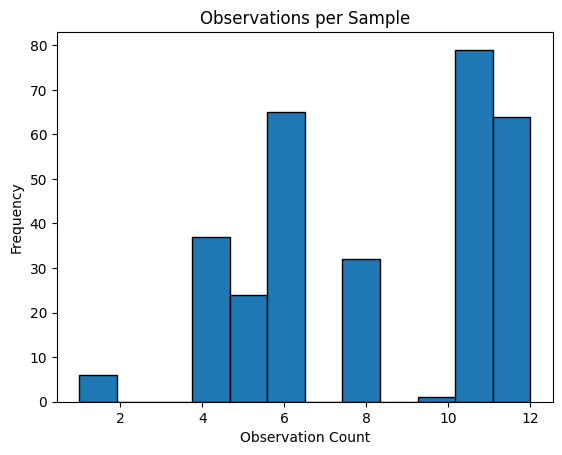

In [7]:
# Create the histogram
plt.hist(observations_by_sample['observationCount'], bins=12, edgecolor='black')

# Add a title
plt.title('Observations per Sample')

# Add labels to the axes
plt.xlabel('Observation Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
count_by_property = execute_to_df('count_by_property.sparql')
count_by_property

,property,observationCount
0,http://vocab.nerc.ac.uk/collection/P01/current...,176
1,http://vocab.nerc.ac.uk/collection/P02/current...,176
2,https://vocab.lternet.edu/vocab/vocab/index.ph...,95
3,http://vocab.nerc.ac.uk/collection/P01/current...,255
4,http://vocab.nerc.ac.uk/collection/P02/current...,447
5,http://vocab.nerc.ac.uk/collection/P02/current...,176
6,http://vocab.nerc.ac.uk/collection/A05/current...,447
7,http://vocab.nerc.ac.uk/collection/P01/current...,176
8,http://vocab.nerc.ac.uk/collection/S06/current...,280
9,http://vocab.nerc.ac.uk/collection/P01/current...,176


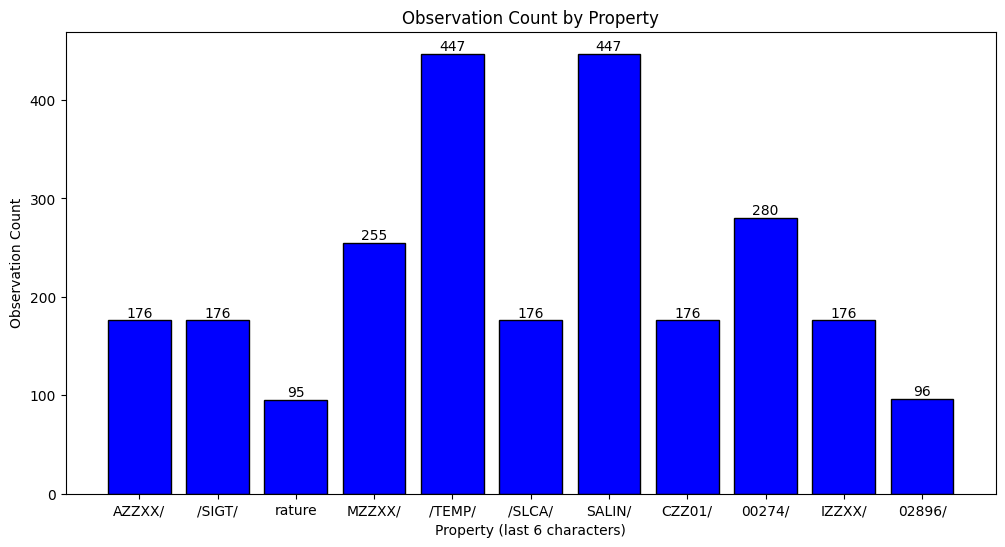

In [16]:
# Extract the last 6 characters of the property column
count_by_property['property_label'] = count_by_property['property'].apply(lambda x: x[-6:])

plt.figure(figsize=(12, 6))
# Create the bar plot
bars = plt.bar(count_by_property['property_label'], count_by_property['observationCount'], color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Property (last 6 characters)')
plt.ylabel('Observation Count')
plt.title('Observation Count by Property')

# Add the amount of observations above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

In [22]:
values_per_property = []
for property_uri in unique_props['property']:
    df = execute_to_df(generate_sparql(name='get_values_by_property.sparql',uri=property_uri))
    values_per_property.append(df)

values_per_property

TemplateNotFound: PREFIX owl: <http://www.w3.org/2002/07/owl#> 
PREFIX sosa: <http://www.w3.org/ns/sosa/>
SELECT DISTINCT ?property ?resultnumeric ?sample
WHERE {
    ?observations a sosa:Observation .
    ?observations sosa:observedProperty ?property .
    ?observationresult <http://qudt.org/schema/qudt/unit> ?unit .
    ?observationresult <http://qudt.org/schema/qudt/numericValue> ?resultnumeric .
    ?observations sosa:hasResult ?observationresult .
    ?observations sosa:hasFeatureOfInterest ?sample .
    ?sample sosa:hasResult ?metadatasample .
    FILTER (?property = <http://vocab.nerc.ac.uk/collection/P01/current/NTRAZZXX/>)  # Replace with the specific property URI
}